## 구글링 Keras RNN 모델 만들기 연습
data input 형식이 너무 어려움(toeplitz 행렬). np, pd 같은 것으로 찾아보기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


- 10개의 뉴런을 가지는 RNN 층 생성함
- SimpleRNN 클래스 객체에서 나오는 10개의 출력값을 하나로 묶어 실수 값을 출력으로 만듦(Dense)
- 다음 스텝의 출력을 예측하는 문제
- 우선 sin 그래프를 그려봄

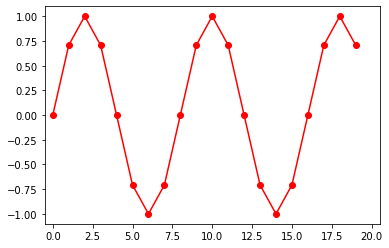

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-') #-하면 실선으로 연결, 없으면 점만 그림
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [3]:
# 입력 순서열은 3스텝 크기(전 3개 자료)의 순서열 사용. target은 그 다음 시간 스텝의 값
# 즉 3개의 순서열을 입력하면 마지막 출력값이 target과 일치하게 만드는 문제

# 시계열 벡터를 행렬 형태로 변환. 3차원 텐서로 만듦
from scipy.linalg import toeplitz
print(s)
print(s[-1]) # 마지막 s(뒤에서 첫 번째)
print(np.zeros(s.shape[0] - 2).shape) # s의 길이 -2개(18개)
print(s[::-1]) # s와 순서를 바꾼 것
print('-' * 20)
print(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1])
#print(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))

[ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -2.44929360e-16  7.07106781e-01  1.00000000e+00  7.07106781e-01
  3.67394040e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -4.89858720e-16  7.07106781e-01  1.00000000e+00  7.07106781e-01]
0.7071067811865486
(18,)
[ 7.07106781e-01  1.00000000e+00  7.07106781e-01 -4.89858720e-16
 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01  3.67394040e-16
  7.07106781e-01  1.00000000e+00  7.07106781e-01 -2.44929360e-16
 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01  1.22464680e-16
  7.07106781e-01  1.00000000e+00  7.07106781e-01  0.00000000e+00]
--------------------
[0.70710678 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ] [ 7.07106781e-01  1.00000000e+00  7.07106781e-01 -4.89858720e-16
 -7.07106781e-01 -1.00000000e+00 -7.07106781e-0

In [4]:
#toeplitz 행렬을 좌우 반전(fliplr)한 array를 나타냄. 이게 무슨 의미인지??
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
print(S.shape)
S[:5, :3]

(19, 20)


array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [5]:
X_train = S[:-1, :3][:, :, np.newaxis]
y_train = S[:-1, 3]
X_train.shape, y_train.shape

((18, 3, 1), (18,))

In [6]:
X_train[:4], y_train[:4]

(array([[[ 0.00000000e+00],
         [ 7.07106781e-01],
         [ 1.00000000e+00]],
 
        [[ 7.07106781e-01],
         [ 1.00000000e+00],
         [ 7.07106781e-01]],
 
        [[ 1.00000000e+00],
         [ 7.07106781e-01],
         [ 1.22464680e-16]],
 
        [[ 7.07106781e-01],
         [ 1.22464680e-16],
         [-7.07106781e-01]]]),
 array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00]))

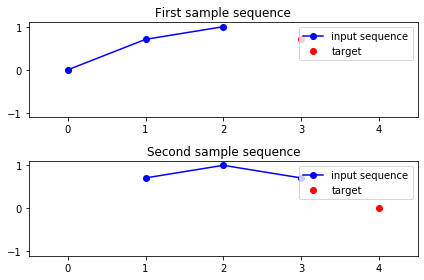

In [7]:
plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label = "input sequence")
plt.plot([3], y_train[0], 'ro', label = "target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend(loc = "upper right")
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label = "input sequence")
plt.plot([4], y_train[1], 'ro', label = "target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend(loc = "upper right")
plt.title("Second sample sequence")
plt.tight_layout()

## Keras의 SimpleRNN
1. Sequential 클래스로 모형 생성
2. add 메소드로 다양한 layer 추가
    - Dense: SimpleRNN의 10개 출력값을 하나로 묶어 실수 값으로 만듦
3. compile 메소드로 목적함수 및 최적화 방법 지정
4. fit 메소드로 가중치? 계산

In [8]:
np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd') #stochastic gradient descent

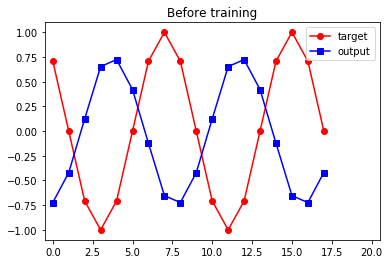

In [9]:
# 학습시키기 전에 이전에 나오는 출력 살펴봄
plt.plot(y_train, 'ro-', label = "target")
#여기서 predict는 단지 target(원래 함수)의 음수 값. 왜??
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label = "output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [10]:
# fit 메소드로 학습
history = model.fit(X_train, y_train, epochs=100, verbose=0)
#verbose=1,2 등등 하면 각 epoch마다 loss 출력됨

Text(0.5, 1.0, 'Loss')

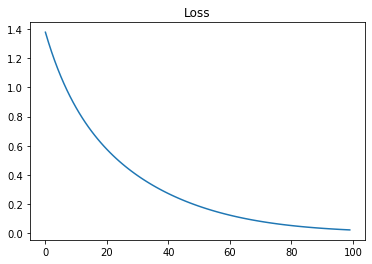

In [11]:
plt.plot(history.history["loss"])
plt.title("Loss")

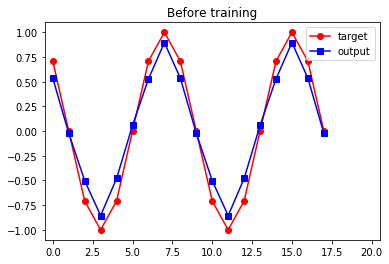

In [13]:
# 학습을 마친 후의 출력
plt.plot(y_train, 'ro-', label = "target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label = "output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend(loc = "upper right")
plt.title("Before training")
plt.show()

final loss: 0.4722222089767456


Text(0.5, 1.0, 'Loss')

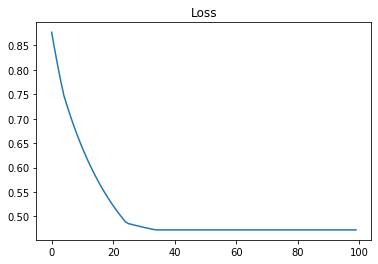

In [33]:
#activation fuction 바꿔보기
np.random.seed(0)
model2 = Sequential()
model2.add(SimpleRNN(10, input_shape=(3,1)))
model2.add(Dense(1, activation='relu'))
#'relu', 'softmax' 등 가능한데, 결과 안 좋음. loss가 0이 아닌 숫자로 수렴함
model2.compile(loss='mse', optimizer='sgd') #stochastic gradient descent

history = model2.fit(X_train, y_train, epochs=100, verbose=0)

print("final loss:", history.history["loss"][-1])
plt.plot(history.history["loss"])
plt.title("Loss")

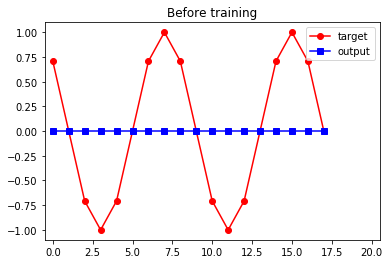

In [34]:
plt.plot(y_train, 'ro-', label = "target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label = "output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend(loc = "upper right")
plt.title("Before training")
plt.show()